In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

plt.style.use('ggplot')

[nltk_data] Downloading package punkt to C:\Users\Olimpio Chris
[nltk_data]     Campos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Olimpio Chris
[nltk_data]     Campos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Olimpio
[nltk_data]     Chris Campos\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Olimpio Chris
[nltk_data]     Campos\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Olimpio
[nltk_data]     Chris Campos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Read the CSV file
all_reviews = pd.read_csv('../reviews.csv')

# Display the DataFrame to verify the data has been loaded successfully
all_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
print(all_reviews.shape)

(568454, 10)


In [21]:
# Downscale to work with
reviews = all_reviews.head(500)

print(reviews.shape)

(500, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

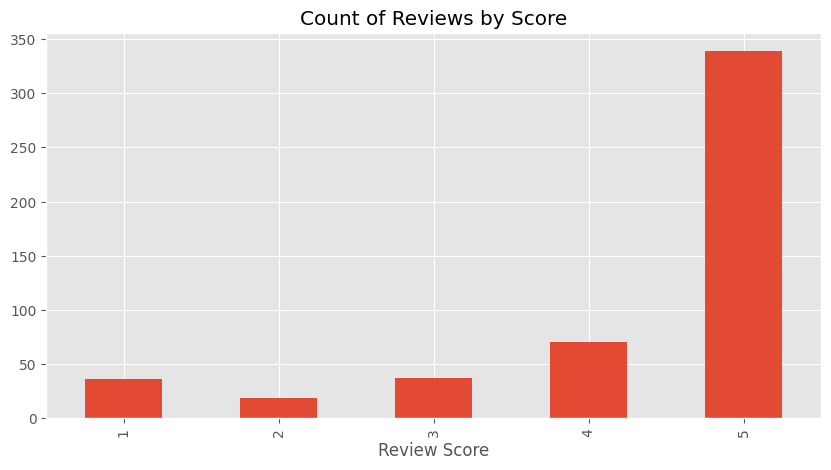

In [30]:
# Plot reviews by score
ax = reviews['Score'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Reviews by Score',
          figsize=(10,5))
ax.set_xlabel('Review Score')

plt.show

# Reviews are bias towards positive scores

Basic NLTK

In [34]:
example = reviews['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [44]:
# Divide the text into tokens
tokens = nltk.word_tokenize(example)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [48]:
# Pair part of speech to tokens
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [56]:
entities = nltk.chunk.ne_chunk(tagged)

print(entities)

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


VADER Sentiment Scoring
Valence Aware Dictionary and SEntiment Reasoner - Bag of words approach

In [71]:
# Algorhythm on how positive, negative or neutral a statemnt is
# Doesn't take into account relationships between words
# Scores are from -1 to 1
sia = SentimentIntensityAnalyzer()

In [72]:
# Examples of a positive score
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [73]:
# Example of a negative score
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [75]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [86]:
# Loop polarity score on dataset
res={}  # Create an empty dictionary to store results
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text = row['Text']  # Extract the 'Text' value from the current row
    myid = row['Id']  # Extract the 'Id' value from the current row
    res[myid] = sia.polarity_scores(text) # Compute sentiment polarity scores for the 'Text' and store them in the 'res' dictionary

100%|██████████| 500/500 [00:00<00:00, 1101.07it/s]


In [92]:
# Store into a pandas dataframe as well as flip it
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'}) # Rename index to Id
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [95]:
# Merge with reviews data
vaders = vaders.merge(reviews, how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


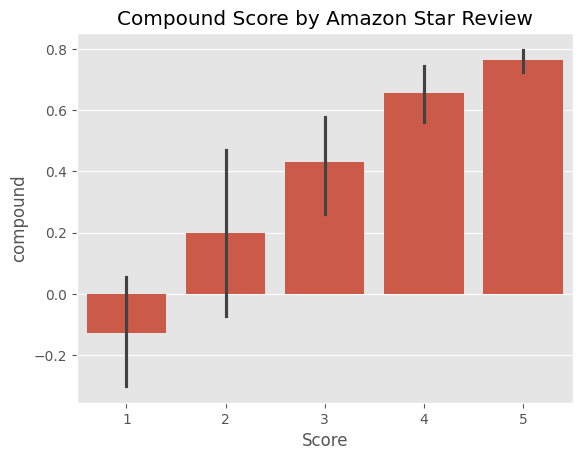

In [98]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

# As stars increase the sentiment of the review becomes more positive

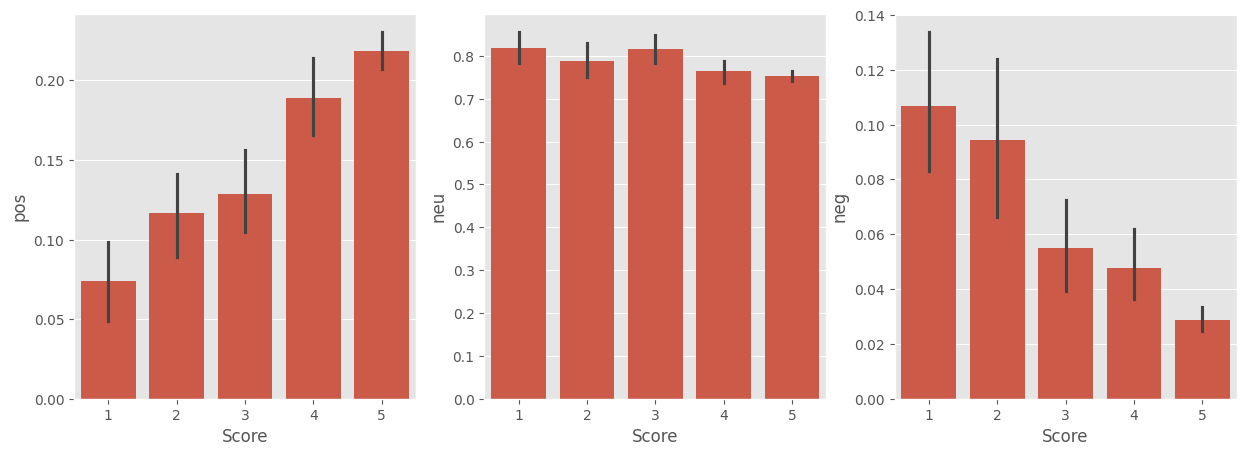

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

plt.show()

# Shows that review sentiment aligns with the amazon star system

Roberta Model

In [104]:
pip install transformers 

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/d9/b7/98f821d70102e2d38483bbb7013a689d2d646daa4495377bc910374ad727/transformers-4.41.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.8 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.8 kB 165.2 kB/s eta 0:00:01
     ----------------- -------------------- 20.5/43.8 kB 165.2 kB/s eta 0:00:01
     -------------------------- ----------- 30.7/43.8 kB 131.3 kB/s eta 0:00:01
     -------------------------- ----------- 30.7/43.8 kB 131.3 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 126.2 kB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.23.0 from https://files.pythonhosted.org/packages/66/e8/bbbad5c7b49c68def42830f96c606e693bfa935a886740a363f04

In [106]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax